In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload 

import pickle
import sys
sys.path.append('../../..')
import numpy as np
from scipy.interpolate import interp1d
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors
%matplotlib inline

output_dir = '/scratch/gpfs/hongwanl/DarkHistory/nmax_convergence/' 


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [9]:
nmax_convergence_no_repro = pickle.load(open(output_dir+'nmax_convergence_no_reprocessing.dat', 'rb'))

rs_list = np.exp(np.arange(np.log(2e3), 5., -.001*4))

nmax_list = [50,100,200]#,300]

with_repro_nmax_10 = pickle.load(open(output_dir+'log10mDM_8.0000_phot_decay_log10param_40.0000_std_distort_nmax_10_no_reion_ind_0.p', 'rb'))
with_repro_nmax_20 = pickle.load(open(output_dir+'log10mDM_8.0000_phot_decay_log10param_40.0000_std_distort_nmax_20_no_reion_ind_0.p', 'rb'))
with_repro_nmax_50 = pickle.load(open(output_dir+'log10mDM_8.0000_phot_decay_log10param_40.0000_std_distort_nmax_50_no_reion_ind_0.p', 'rb'))
with_repro_nmax_100 = pickle.load(open(output_dir+'log10mDM_8.0000_phot_decay_log10param_40.0000_std_distort_nmax_100_no_reion_ind_0.p', 'rb'))
with_repro_nmax_200 = pickle.load(open(output_dir+'log10mDM_8.0000_phot_decay_log10param_40.0000_std_distort_nmax_200_no_reion_ind_0.p', 'rb'))

In [10]:
baseline = nmax_convergence_no_repro[0]
fudge    = nmax_convergence_no_repro[1]
nmax_convergence_alt = nmax_convergence_no_repro[2]

baseline_int = interp1d(rs_list, baseline[:,1], bounds_error=False)


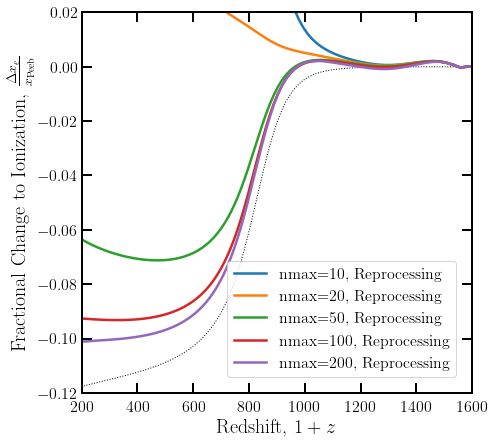

In [11]:
plt.figure(figsize=(7,7))
plt.axis([200,1600, -.12,.02])
ax = plt.gca()

color = iter(plt.cm.PuRd(np.linspace(0.3, 1, len(nmax_list))))


# for i,nmax in enumerate(nmax_list):
#     c = next(color)
#     ax.plot(rs_list, nmax_convergence_alt[nmax][:,1]/baseline[:,1]-1, 
#             linewidth = 1.8, label=r'nmax='+str(nmax), c=c)


ax.plot(rs_list, fudge[:,1] / baseline[:,1] - 1, linewidth=1, linestyle=':', c='k')


ax.plot(with_repro_nmax_10['data'][-1]['rs'], with_repro_nmax_10['data'][-1]['x'][:,0] / baseline_int(with_repro_nmax_10['data'][-1]['rs']) - 1., label='nmax=10, Reprocessing')
ax.plot(with_repro_nmax_20['data'][-1]['rs'], with_repro_nmax_20['data'][-1]['x'][:,0] / baseline_int(with_repro_nmax_20['data'][-1]['rs']) - 1., label='nmax=20, Reprocessing')
ax.plot(with_repro_nmax_50['data'][-1]['rs'], with_repro_nmax_50['data'][-1]['x'][:,0] / baseline_int(with_repro_nmax_50['data'][-1]['rs']) - 1., label='nmax=50, Reprocessing')
ax.plot(with_repro_nmax_100['data'][-1]['rs'], with_repro_nmax_100['data'][-1]['x'][:,0] / baseline_int(with_repro_nmax_100['data'][-1]['rs']) - 1., label='nmax=100, Reprocessing')
ax.plot(with_repro_nmax_200['data'][-1]['rs'], with_repro_nmax_200['data'][-1]['x'][:,0] / baseline_int(with_repro_nmax_200['data'][-1]['rs']) - 1., label='nmax=200, Reprocessing')
   
# ax.plot(rs_list, nmax_convergence_alt[50][:,1]/baseline[:,1]-1, 
#          linewidth = 1.8, label=r'$2s\to 1s$ BB')
# ax.plot(rs_list, tmp/baseline[:,1]-1, 
#              linewidth = 1.8, label=r'$2s\to 1s$ vacuum')

# hyrec plots
lw = 1.2
# ax.plot(EMLA_data[:,0], EMLA_data[:,1], color='black', 
#          linewidth = 2.0, linestyle = '--', 
#          label=r'Hyrec')


# plot labels
ax.set_xlabel(r'Redshift, $1+z$', fontsize=20)
ax.set_ylabel(r'Fractional Change to Ionization, $\frac{\Delta x_e}{x_{\mathrm{Peeb}}}$', fontsize=20)
ax.legend()

In [14]:
len(with_repro_nmax_200['data'])

5

In [12]:
with_repro_nmax_200['data'][-1]['x'][:,0]

array([9.99999999e-01, 9.99999999e-01, 9.99999999e-01, 9.99999998e-01,
       9.99999998e-01, 9.99999997e-01, 9.99999996e-01, 9.99999994e-01,
       9.99999992e-01, 9.99999989e-01, 9.99999985e-01, 9.99999978e-01,
       9.99999969e-01, 9.99999956e-01, 9.99999937e-01, 9.99999909e-01,
       9.99999869e-01, 9.99999808e-01, 9.99999719e-01, 9.99999584e-01,
       9.99999380e-01, 9.99999071e-01, 9.99998598e-01, 9.99997870e-01,
       9.99996739e-01, 9.99994973e-01, 9.99992191e-01, 9.99987779e-01,
       9.99980730e-01, 9.99969377e-01, 9.99950954e-01, 9.99920818e-01,
       9.99871130e-01, 9.99788540e-01, 9.99650139e-01, 9.99416317e-01,
       9.99018090e-01, 9.98334536e-01, 9.97152637e-01, 9.95096259e-01,
       9.91502955e-01, 9.85219214e-01, 9.76482799e-01, 9.62060918e-01,
       9.40863326e-01, 9.12267161e-01, 8.76707838e-01, 8.35092667e-01,
       7.88603882e-01, 7.38534094e-01, 6.86153821e-01, 6.32625705e-01,
       5.78964729e-01, 5.26027494e-01, 4.74519669e-01, 4.25014164e-01,
      